Iman Kahbasi

1402-03-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from sympy.matrices import Matrix # symbolic math package


In [2]:
def svdmat(G):
    # equivalent of matlab command [U,S,V] = svd(G)
    U, svec, VH = la.svd(G)
    S = la.diagsvd(svec, *G.shape)
    V = VH.T
    #svec = np.reshape(s,(len(s),1))
    return U, S, V, svec

<h1><center><b>Load data</b></center></h1>


In [3]:
data0 = np.loadtxt('data2.txt')
data = data0[data0[:, 0].argsort()]
print(data.shape)
x = data[:, 0]
y = data[:, 1]

(342, 2)


<h1><center><b>الف</b></center></h1>
<h1><center><b>Making G matrix</b></center></h1>

(342, 13)


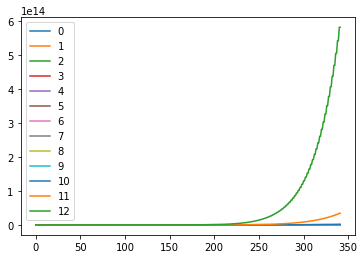

In [4]:
nmodel = 12
G = np.ones((x.size, nmodel+1))
for ii in range(nmodel+1):
    G[:, ii] = x ** ii
print(G.shape)

for ii in range(nmodel+1):
    plt.plot(G[:, ii], label=str(ii))
plt.legend()

<h1><center><b></b></center></h1>
<h1><center><b>Least square</b></center></h1>

In [5]:
m = la.inv(G.T@G) @ G.T @ y
y_pred = G @ m

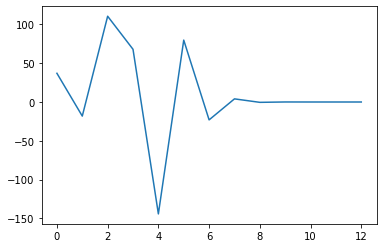

In [6]:
plt.plot(m)

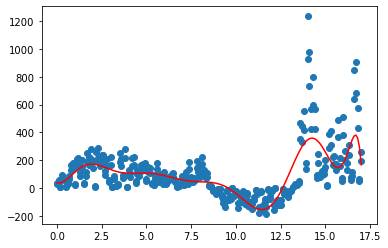

In [7]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred, 'r')

<h1><center><b>ب</b></center></h1>
<h1><center><b>SVD</b></center></h1>

In [8]:
U, S, V, svec = svdmat(G)
print(U.shape, S.shape, V.shape, svec.shape)

(342, 342) (342, 13) (13, 13) (13,)


<h1><center><b>ج</b></center></h1>
<h1><center><b>طیف مقادیر تکین</b></center></h1>

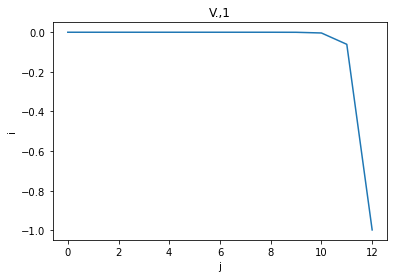

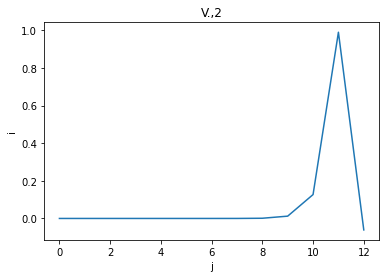

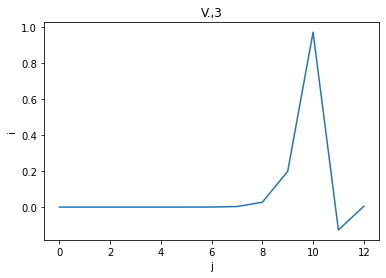

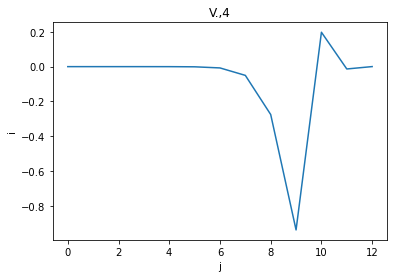

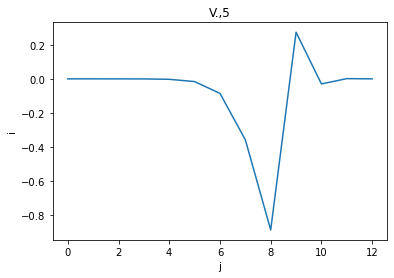

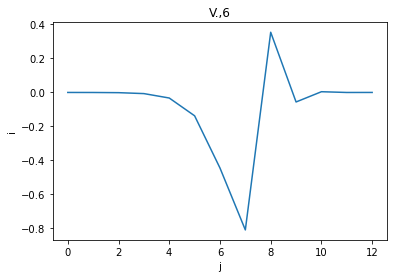

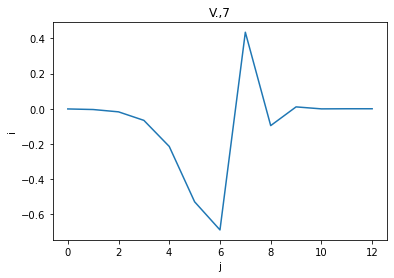

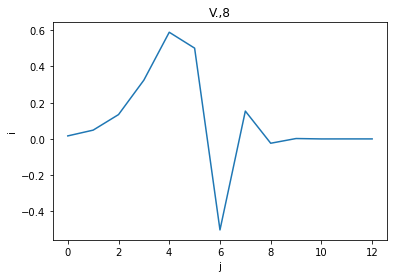

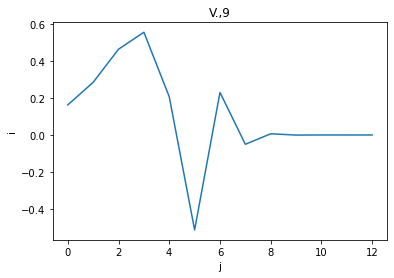

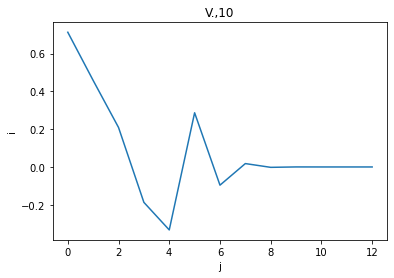

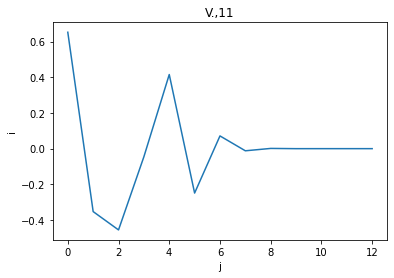

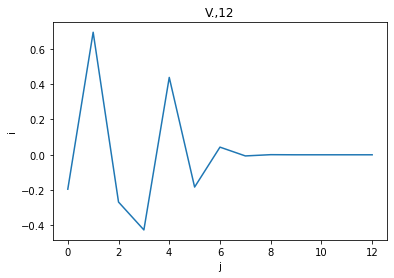

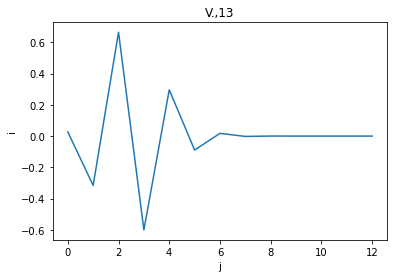

In [10]:
for ii in range(13):
#     print(f'Displaying image of null space model v{ii+1}')
    m = V[:, ii]
    plt.figure()
    plt.plot(m)
    plt.xlabel('j')
    plt.ylabel('i')
    plt.title(f'V.,{ii+1}')
    plt.show()

<h1><center><b>د</b></center></h1>
<h1><center><b>Condition number</b></center></h1>

In [11]:
svec

array([2.23215947e+15, 5.70830392e+12, 3.34183743e+10, 3.41256291e+08,
       5.51167394e+06, 1.35483981e+05, 5.04594729e+03, 2.92987817e+02,
       2.91397140e+01, 6.66923267e+00, 2.57586803e+00, 6.41525585e-01,
       1.00370822e-01])

In [12]:
print(svec.shape)
cond = svec[0] / svec[-1]
print('Condition Number:', cond)

(13,)
Condition Number: 2.2239127153092636e+16


In [13]:
# condition numbers for each p number
for p in range(13):
    condition_number = svec[0]/svec[p]
    condition_number = round(condition_number, 1)
    print(f'{p:>2} {condition_number:>25}')
# [ for ii in range(13)]

 0                       1.0
 1                     391.0
 2                   66794.4
 3                 6541006.1
 4               404987576.9
 5             16475449359.5
 6            442366783585.4
 7           7618608507292.2
 8          76601969086346.5
 9         334695097100498.3
10         866565928818051.4
11        3479455107166487.0
12    2.2239127153092636e+16


<h1><center><b>هه</b></center></h1>
<h1><center><b>Picard plot</b></center></h1>

In [14]:
# print(S_inv@abs(Up.T@y))
# print(abs(Up.T@y)/np.diag(Sp))

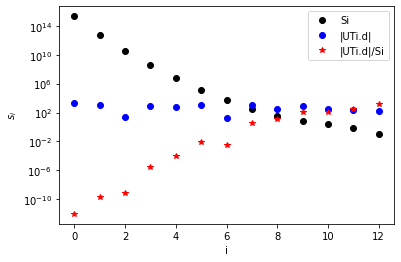

In [15]:
nkeep = 13
Up = U[:, :nkeep]
Vp = V[:, :nkeep]
Sp = S[:nkeep, :nkeep]
S_inv = np.linalg.inv(Sp)

plt.plot(np.diag(Sp), 'ko', label='Si')
plt.plot(abs(Up.T@y), 'bo', label='|UTi.d|')
plt.plot(S_inv@abs(Up.T@y), 'r*', label='|UTi.d|/Si')
plt.yscale('log')
# plt.axis('tight')
plt.xlabel('i')
plt.ylabel(r'$s_i$')
plt.legend()
# plt.xlim([-1, 15])

# plt.semilogy(svec, 'o')

In [16]:
# plt.imshow(S[:nmodel+1, :nmodel+1], 'gray'); plt.tight_layout(); plt.colorbar()

In [17]:
# # Using SVD with all 210 singular values
# p = 10
# # Find Up, Vp, Sp
# Up = U[:,:nkeep]
# Vp = V[:,:nkeep]
# Sp = S[:nkeep,:nkeep]

# # Generalized inverse solutions for noisy data (mn) 
# # and noise-free data (mperf)
# Sinv = la.inv(Sp)
# mn    = Vp@Sinv@Up.T @ dn
# mperf = Vp@Sinv@Up.T @ d

<h1><center><b>هه</b></center></h1>
<h1><center><b>ml2</b></center></h1>


In [18]:
nkeep = 8
Up = U[:, :nkeep]
Vp = V[:, :nkeep]
Sp = S[:nkeep, :nkeep]
S_inv = np.linalg.inv(Sp)
Gp = Up @ Sp @ Vp.T
mp = la.inv(Gp.T@Gp) @ Gp.T @ y
y_pred_p8 = Gp @ mp

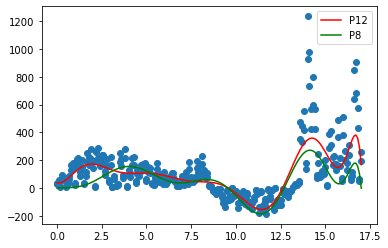

In [19]:
plt.plot(x, y, 'o')
plt.plot(x, y_pred, 'r', label='P12')
plt.plot(x, y_pred_p8, 'g', label='P8')
plt.legend()

1 (342, 13)


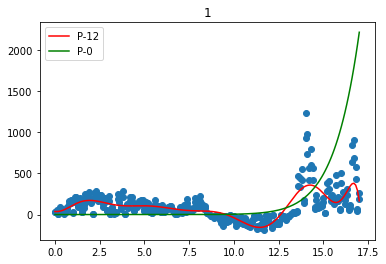

2 (342, 13)


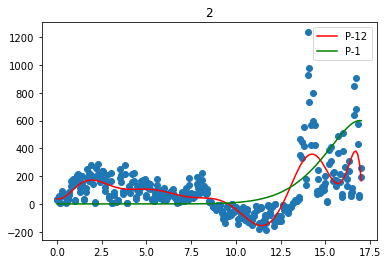

3 (342, 13)


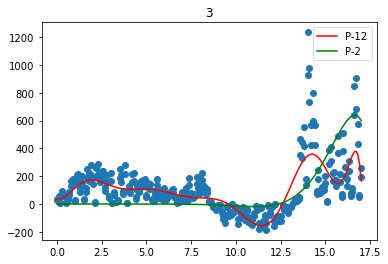

4 (342, 13)


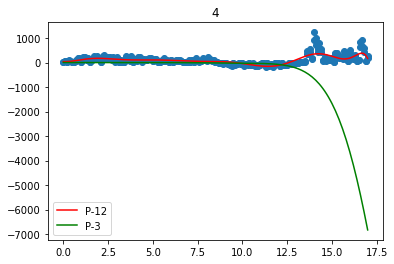

5 (342, 13)


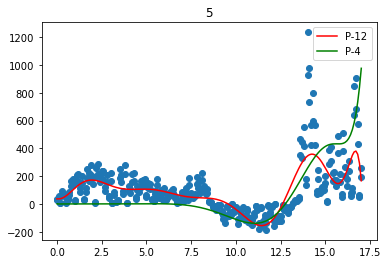

6 (342, 13)


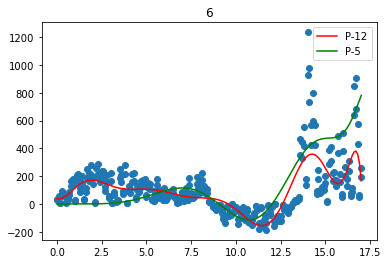

7 (342, 13)


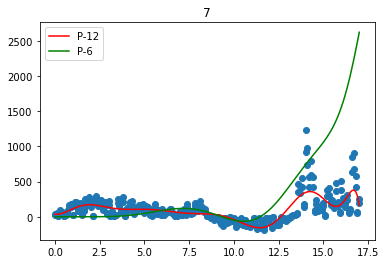

8 (342, 13)


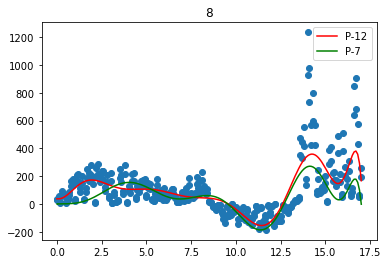

9 (342, 13)


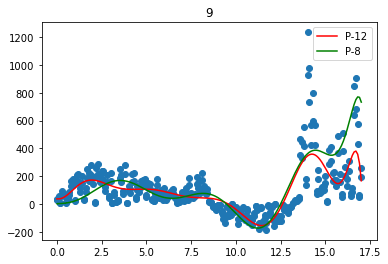

10 (342, 13)


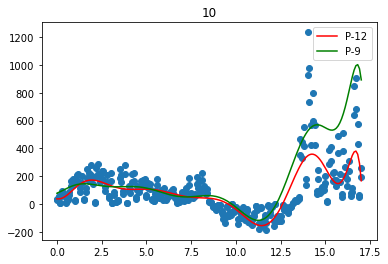

11 (342, 13)


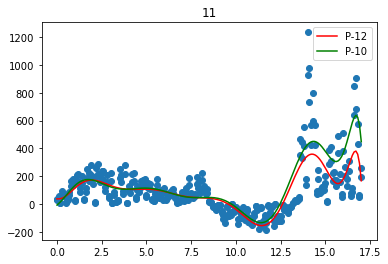

12 (342, 13)


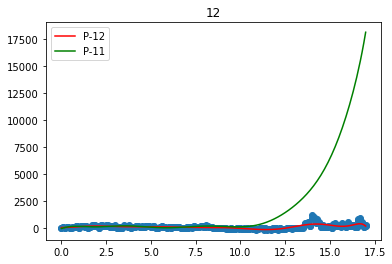

13 (342, 13)


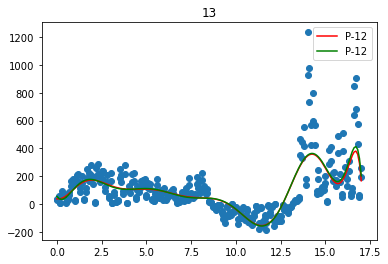

In [20]:
lst_m = []
lst_r = []
for nkeep in range(1, 14):
    Up = U[:,:nkeep]
    Vp = V[:,:nkeep]
    Sp = S[:nkeep,:nkeep]
    S_inv = np.linalg.inv(Sp)
#     print(f'{Up=}, {Vp=}, {Sp=}')
    #
    Gp = Up @ Sp @ Vp.T
    mp = la.inv(Gp.T@Gp) @ Gp.T @ y
    print(nkeep, Gp.shape)
    y_pred_p = Gp @ mp
    #
    lst_m.append(np.linalg.norm(mp))
    lst_r.append(np.linalg.norm(y_pred_p-y))
    #
    plt.plot(x, y, 'o')
    plt.plot(x, y_pred, 'r', label='P-12')
    plt.plot(x, y_pred_p, 'g', label=f'P-{nkeep-1}')
    plt.title(nkeep)
    plt.legend()
    plt.show()

In [22]:
# plt.plot(lst_m, lst_r, 'o')